In [114]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats






In [120]:
stimulus_type = "normal" # "gaussian" or "normal"
reward_type = "normal" # "gaussian" or "normal"

t_stimulus = 100
t_reward = 200

def stimulus_func(t):
    if stimulus_type == "normal":

        if t == t_stimulus:
            return 1
        else:
            return 0
    elif stimulus_type == "gaussian":
        mu, sigma, scale = t_stimulus, 0.5, 1
        if abs(t_stimulus - t) < 3*sigma:
            return stats.norm(mu, sigma).pdf(t) * scale
        else:
            return 0


def reward_func(t):
    if reward_type == "normal":
        if t == t_reward:
            return 2
        else:
            return 0
    elif reward_type == "gaussian":
        mu, sigma, scale = t_reward, 0.5, 2
        if abs(t_reward - t) < 3*sigma:
            return stats.norm(mu, sigma).pdf(t) * scale
        else:
            return 0
    
    

In [133]:
t_steps = 1

trial_time = 250
t_axes = np.arange(0, trial_time, t_steps)
predictions = np.zeros(len(t_axes))
delta = np.zeros(len(t_axes))

tau = t_axes.copy()
weights = np.zeros(len(t_axes))

    
n_trials = 100
n_axes = np.arange(0, n_trials, 1)
res = np.zeros((n_trials, len(t_axes)))
epsilon = 0.5



n_trials = 200
n_axes = np.arange(0, n_trials, 1)
res = np.zeros((n_trials, len(t_axes)))
epsilon = 0.9


In [134]:


def update_weights(weights, idx_tau, epsilon, delta, idx_t):
    weights[idx_tau]+= epsilon * delta[idx_t] * stimulus_func(idx_t - idx_tau)
    return weights

def make_predictions(predictions,weights, idx_t):
    for idx_tau in range(idx_t):
        predictions[idx_t] += weights[idx_tau] * stimulus_func(idx_t - idx_tau)      
    return predictions


In [135]:

weights = np.zeros(len(t_axes))

for n in range(n_trials):   
    delta = np.zeros(len(t_axes))
    predictions = np.zeros(len(t_axes))
    
    for idx_t,t in enumerate(t_axes):
        predictions = make_predictions(predictions,weights, idx_t)
    
    for idx_t,t in enumerate(t_axes):
        if t != t_axes[-1]:
            delta[idx_t] = reward_func(idx_t) + predictions[idx_t+1] - predictions[idx_t]
    
    for idx_t,t in enumerate(t_axes): 
        for idx_tau in range(idx_t):
            old_weights = weights.copy()
            weights = update_weights(old_weights, idx_tau, epsilon, delta, t) 
                     
    res[n, :] = delta
            
                

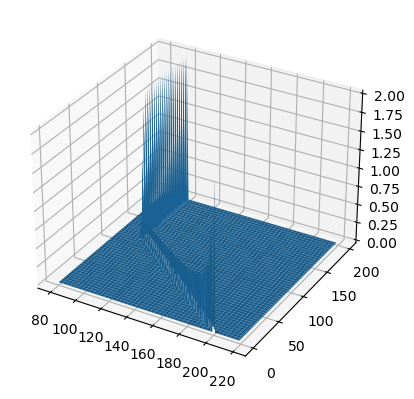

In [142]:
ax = plt.figure().add_subplot(projection='3d')
X = t_axes[80:220]
Y = n_axes
X, Y = np.meshgrid(X, Y)
Z = res[:,80:220]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z)

# Customize the z axis.
#cax.set_zlim(0, 2)
ax.view_init(30, -60) 
plt.show()